In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")



In [3]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,8/1/2023,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,8/1/2023,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


Question #2: 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [5]:
#overall on time performance
total_trips = len(wego)
on_time_trips = wego['ADJUSTED_ONTIME_COUNT'].sum()

overall_on_time_performance = round((on_time_trips / total_trips) * 100, 2)
overall_on_time_performance

77.08

In [6]:
#on-time Performance by Route 
#I created a dataframe to show how the ontime performance changes based on the route compared to the ovrall ontime performace calculated above 

total_trips_per_route = wego.groupby('ROUTE_ABBR')['ADJUSTED_ONTIME_COUNT'].count().reset_index(name='trips_per_route')

by_route = wego.groupby('ROUTE_ABBR')['ADJUSTED_ONTIME_COUNT'].sum().reset_index()

by_route = by_route.merge(total_trips_per_route, on='ROUTE_ABBR')
by_route['on_time_performance'] = round(by_route['ADJUSTED_ONTIME_COUNT'] / by_route['trips_per_route'] * 100, 2)
by_route

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,trips_per_route,on_time_performance
0,3,34516,47162,73.19
1,7,13417,18026,74.43
2,22,22492,25959,86.64
3,23,35137,42108,83.44
4,50,36309,43291,83.87
5,52,37736,51819,72.82
6,55,42080,61944,67.93
7,56,48361,60020,80.57


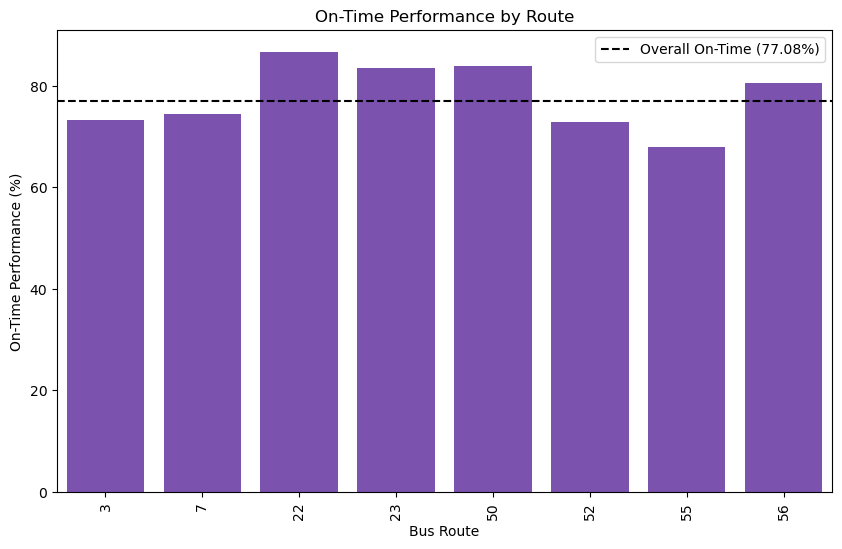

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ROUTE_ABBR', y='on_time_performance', data=by_route, color='#7B42BF')

plt.axhline(overall_on_time_performance, color='black', linestyle='--', label=f'Overall On-Time ({overall_on_time_performance:.2f}%)')

plt.title('On-Time Performance by Route')
plt.xlabel('Bus Route')
plt.ylabel('On-Time Performance (%)')
plt.xticks(rotation=90)  
plt.legend(loc='upper right')

plt.show()


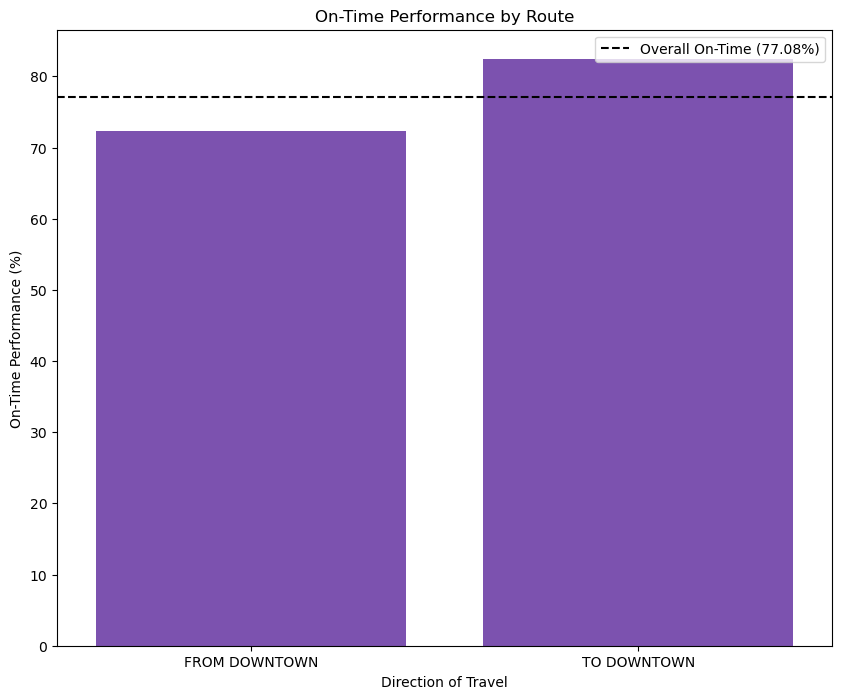

In [8]:
#on-time Performance by direction of travel 
total_trips_by_direction_of_travel = wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_ONTIME_COUNT'].count().reset_index(name='trips_by_direction_of_travel')

by_direction_of_travel = wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_ONTIME_COUNT'].sum().reset_index()

by_direction_of_travel  = by_direction_of_travel.merge(total_trips_by_direction_of_travel, on='ROUTE_DIRECTION_NAME')

by_direction_of_travel ['on_time_performance'] = round(by_direction_of_travel['ADJUSTED_ONTIME_COUNT'] / by_direction_of_travel['trips_by_direction_of_travel'] * 100, 2)
by_direction_of_travel 


#graph
plt.figure(figsize=(10, 8))
sns.barplot(x='ROUTE_DIRECTION_NAME', y='on_time_performance', data=by_direction_of_travel,  color='#7B42BF')

plt.axhline(overall_on_time_performance, color='black', linestyle='--', label=f'Overall On-Time ({overall_on_time_performance:.2f}%)')

plt.title('On-Time Performance by Route')
plt.xlabel('Direction of Travel')
plt.ylabel('On-Time Performance (%)') 
plt.legend(loc='upper right')

plt.show()


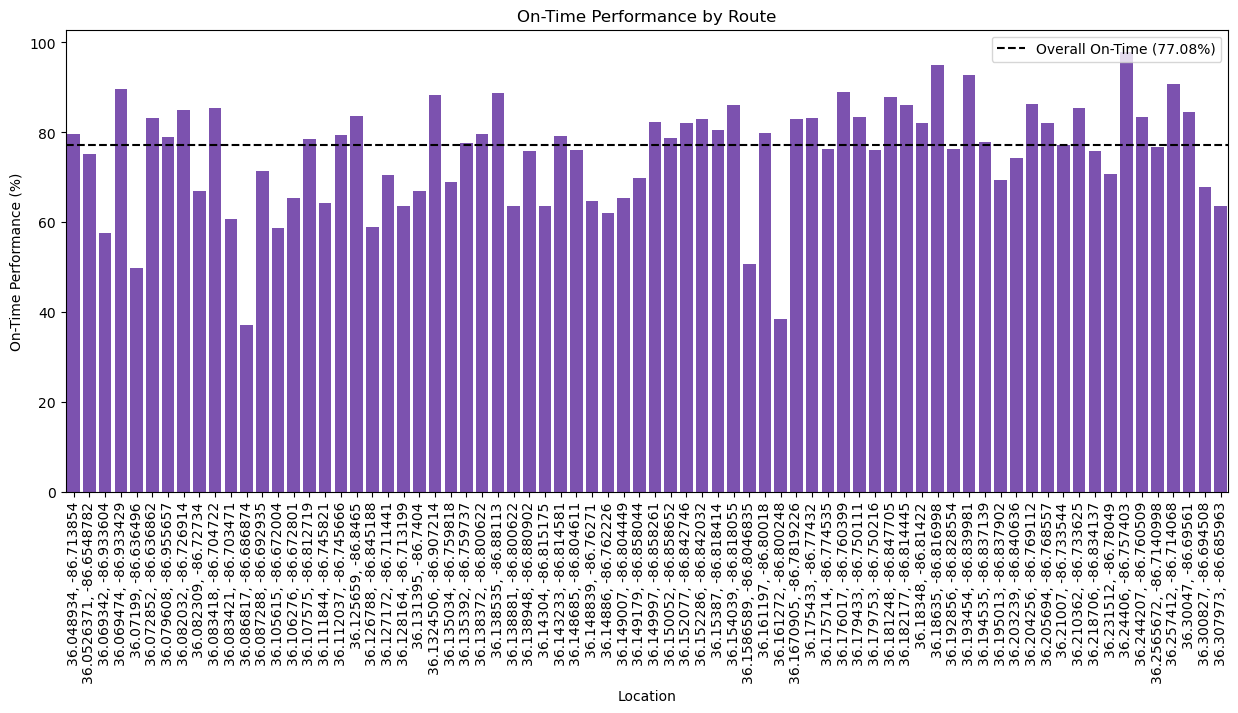

In [9]:
#on-time Performance by Location 

by_location= wego.groupby(['LATITUDE', 'LONGITUDE'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index()

total_trips_by_location = wego.groupby(['LATITUDE', 'LONGITUDE'])['ADJUSTED_ONTIME_COUNT'].count().reset_index(name='trips_by_location')

by_location = by_location.merge(total_trips_by_location, on=['LATITUDE', 'LONGITUDE'])
by_location['on_time_performance'] = round(by_location['ADJUSTED_ONTIME_COUNT'] / by_location['trips_by_location'] * 100, 2)

by_location['location'] = by_location['LATITUDE'].astype(str) + ', ' + by_location['LONGITUDE'].astype(str)

#graph
plt.figure(figsize=(15, 6))
sns.barplot(x='location', y= 'on_time_performance', data=by_location,  color='#7B42BF')

plt.axhline(overall_on_time_performance, color='black', linestyle='--', label=f'Overall On-Time ({overall_on_time_performance:.2f}%)')

plt.title('On-Time Performance by Route')
plt.xlabel('Location')
plt.ylabel('On-Time Performance (%)')
plt.xticks(rotation=90)  
plt.legend(loc='upper right')
plt.show()

In [10]:
wego['HDWY_DEV_PER'] = round(wego['HDWY_DEV'] / wego['SCHEDULED_HDWY'] * 100, 2)


In [11]:
dropped_wego = wego[np.isfinite(wego['HDWY_DEV_PER'])]


In [12]:
mean_hdwy_overall = dropped_wego [['SCHEDULED_HDWY', 'HDWY_DEV', 'HDWY_DEV_PER']].mean()
mean_hdwy_overall 

SCHEDULED_HDWY    18.107727
HDWY_DEV           0.517809
HDWY_DEV_PER       3.162494
dtype: float64

In [13]:
HDWY_BY_ROUTE = dropped_wego.groupby('ROUTE_ABBR').agg(
    mean_scheduled_hdwy=('SCHEDULED_HDWY', 'mean'),
    mean_hdwy_dev=('HDWY_DEV', 'mean'),
    mean_hdway_per=('HDWY_DEV_PER', 'mean'),
).reset_index()
HDWY_BY_ROUTE 

,ROUTE_ABBR,mean_scheduled_hdwy,mean_hdwy_dev,mean_hdway_per
0,3,19.515786,0.580907,5.627750
1,7,22.824667,0.336808,2.190710
2,22,29.646322,0.955867,3.389041
3,23,18.221891,1.053563,5.450443
4,50,19.560089,0.211241,1.204501
5,52,19.717527,0.974776,4.163452
6,55,13.605512,0.260653,2.534184
7,56,14.018689,0.148623,1.318185


In [14]:
HDWY_BY_ROUTE_DIRECTION = dropped_wego.groupby('ROUTE_DIRECTION_NAME').agg(
    mean_scheduled_hdwy=('SCHEDULED_HDWY', 'mean'),
    mean_hdwy_dev=('HDWY_DEV', 'mean'),
    mean_hdway_per=('HDWY_DEV_PER', 'mean'),
).reset_index()
HDWY_BY_ROUTE_DIRECTION 

,ROUTE_DIRECTION_NAME,mean_scheduled_hdwy,mean_hdwy_dev,mean_hdway_per
0,FROM DOWNTOWN,17.550526,0.579990,3.688621
1,TO DOWNTOWN,18.740758,0.447166,2.564766


In [15]:
HDWY_BY_location = dropped_wego.groupby(['LATITUDE', 'LONGITUDE']).agg(
    mean_scheduled_hdwy=('SCHEDULED_HDWY', 'mean'),
    mean_hdwy_dev=('HDWY_DEV', 'mean'),
    mean_hdway_per=('HDWY_DEV_PER', 'mean'),
).reset_index()
HDWY_BY_location

,LATITUDE,LONGITUDE,mean_scheduled_hdwy,mean_hdwy_dev,mean_hdway_per
0,36.048934,-86.713854,30.633803,0.827780,2.612328
1,36.052637,-86.654878,13.680261,0.274289,2.430440
2,36.069342,-86.933604,32.183156,1.335219,19.749554
3,36.069474,-86.933429,31.149791,0.982707,3.130047
4,36.071990,-86.636496,13.733919,0.280872,2.728358
...,...,...,...,...,...
64,36.256567,-86.714100,14.013843,0.141704,1.291504
65,36.257412,-86.714068,14.027686,0.115871,0.995471
66,36.300470,-86.695610,14.019701,0.164831,1.403747
67,36.300827,-86.694508,14.010168,0.176776,1.754017


In [75]:
#i created a column classifying wether bunching or gapping occured or if the headway is acceptable 

def classify_headway(row):
    if row['HDWY_DEV_PER'] < 50:
        return 'Bunching'
    elif row['HDWY_DEV_PER'] > 150:
        return 'Gapping'
    else:
        return 'Acceptable'

dropped_wego['HEADWAY_CLASSIFICATION'] = dropped_wego.apply(classify_headway, axis=1)

C:\Users\bonil\AppData\Local\Temp\ipykernel_19956\1781589970.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_wego['HEADWAY_CLASSIFICATION'] = dropped_wego.apply(classify_headway, axis=1)


In [17]:
dropped_wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,HEADWAY_CLASSIFICATION
7,120230801,1,99457897,8/1/2023,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,13.216666,10.0,7.62,Bunching
8,120230801,1,99457898,8/1/2023,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,5.62,Bunching
9,120230801,1,99457899,8/1/2023,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,-3.22,Bunching
11,120230801,1,99457901,8/1/2023,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,10.800000,5.0,-14.44,Bunching
12,120230801,1,99457902,8/1/2023,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0,0,0.0,0,0.000000,NaN,-25.89,Bunching
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,9/30/2023,7,702,2312,353447,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,7.033333,NaN,22.39,Bunching
350323,120230930,2,100406609,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,1.966666,5.0,16.39,Bunching
350324,120230930,2,100406610,9/30/2023,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,17.56,Bunching
350326,120230930,2,100406612,9/30/2023,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,6.22,Bunching


In [79]:
dropped_wego[['SCHEDULED_HDWY', 'HDWY_DEV', 'HDWY_DEV_PER', 'HEADWAY_CLASSIFICATION']]

,SCHEDULED_HDWY,HDWY_DEV,HDWY_DEV_PER,HEADWAY_CLASSIFICATION
7,35.0,2.666666,7.62,Bunching
8,35.0,1.966666,5.62,Bunching
9,15.0,-0.483334,-3.22,Bunching
11,15.0,-2.166667,-14.44,Bunching
12,15.0,-3.883334,-25.89,Bunching
...,...,...,...,...
350320,30.0,6.716666,22.39,Bunching
350323,30.0,4.916666,16.39,Bunching
350324,30.0,5.266666,17.56,Bunching
350326,30.0,1.866666,6.22,Bunching


In [18]:
#this dataframe shows the breakdaown of how many 
HDWY_classification_route = dropped_wego.groupby('ROUTE_ABBR')['HEADWAY_CLASSIFICATION'].value_counts().unstack()
HDWY_classification_route

HEADWAY_CLASSIFICATION,Acceptable,Bunching,Gapping
ROUTE_ABBR,,,
3,2649,33630,304
7,559,10960,59
22,685,16266,56
23,1764,26528,186
50,1352,33180,50
52,3404,36043,440
55,5752,42918,746
56,3841,44308,167


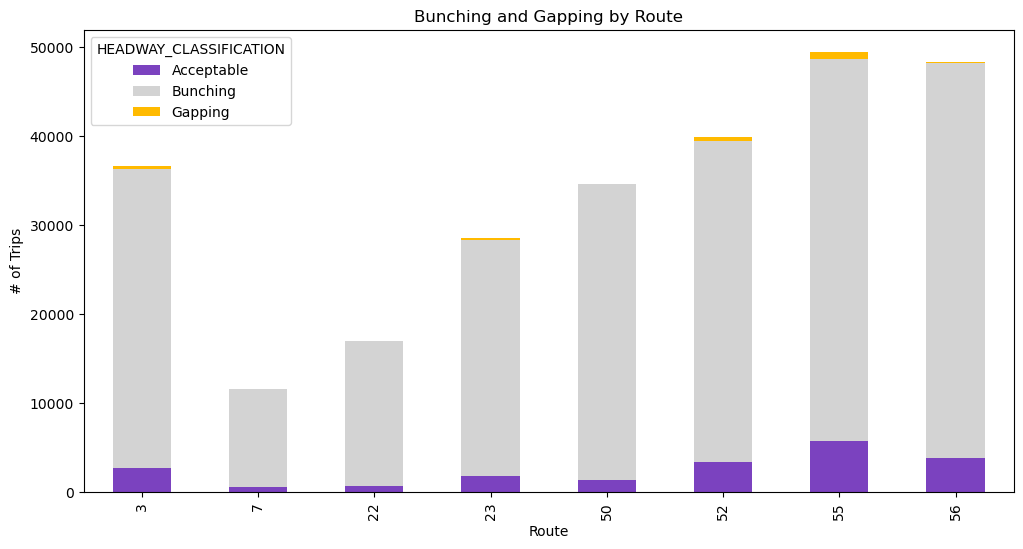

In [59]:
colors = ['#7B42BF', '#D3D3D3', '#FFBA00'] 
HDWY_classification_route.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)
plt.title('Bunching and Gapping by Route')
plt.ylabel('# of Trips')
plt.xlabel('Route')
plt.show()

In [20]:
HDWY_classification_direction = dropped_wego.groupby('ROUTE_DIRECTION_NAME')['HEADWAY_CLASSIFICATION'].value_counts().unstack()
HDWY_classification_direction

HEADWAY_CLASSIFICATION,Acceptable,Bunching,Gapping
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,12411,127633,1348
TO DOWNTOWN,7595,116200,660


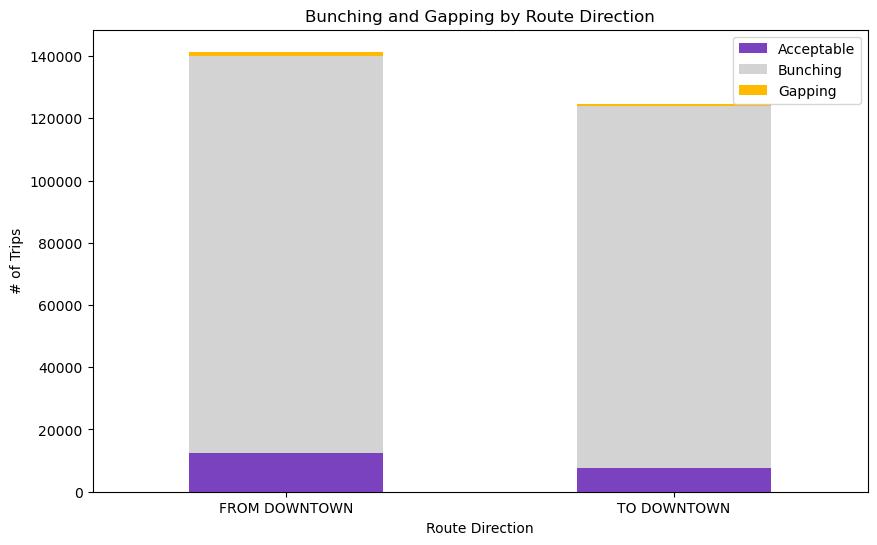

In [61]:
colors = ['#7B42BF', '#D3D3D3', '#FFBA00'] 
HDWY_classification_direction.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Bunching and Gapping by Route Direction')
plt.ylabel('# of Trips')
plt.xlabel('Route Direction')
plt.xticks(rotation=0) 
plt.legend(loc='upper right')
plt.show()

In [63]:
HDWY_classification_location = dropped_wego.groupby(['LATITUDE', 'LONGITUDE'])['HEADWAY_CLASSIFICATION'].value_counts().unstack()
HDWY_classification_location

,HEADWAY_CLASSIFICATION,Acceptable,Bunching,Gapping
LATITUDE,LONGITUDE,,,
36.048934,-86.713854,81.0,2187.0,4.0
36.052637,-86.654878,287.0,4597.0,20.0
36.069342,-86.933604,132.0,1802.0,37.0
36.069474,-86.933429,66.0,1847.0,3.0
36.071990,-86.636496,778.0,4001.0,118.0
...,...,...,...,...
36.256567,-86.714100,446.0,4374.0,20.0
36.257412,-86.714068,219.0,4615.0,6.0
36.300470,-86.695610,157.0,4662.0,3.0
